# Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST

## Deskripsi Umum
Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

## Tentang Dataset MNIST

Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

## Detail Kuis

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

4. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

5. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

6. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

7. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

# Bantuan

Berikut merupakan kode bantuan untuk proses mengunduh dataset MNIST

In [1]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

D:\SDK\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

# Nomor 1

In [4]:
# import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt

0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
Name: target, dtype: int64


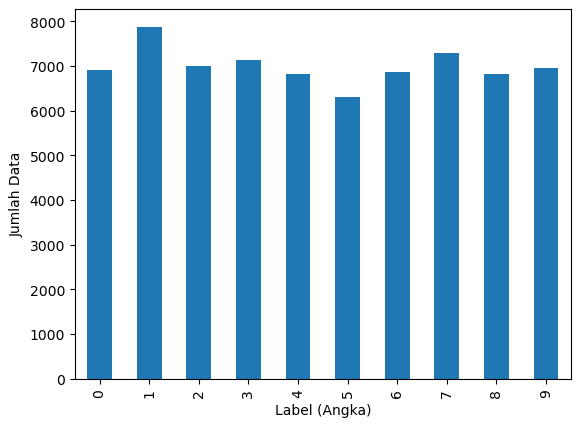

Tidak ada ketidakseimbangan yang signifikan dalam dataset MNIST.


In [5]:
# mengubah menjadi dataframe
mnist_df = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)
mnist_df['target'] = mnist.target

# memastikan jumlah data setiap label angka (0-9)
label_counts = mnist_df['target'].value_counts(sort=False)
print(label_counts)
    
# melihat apakah terdapat data imbalance pada dataset MNIST yang digunakan
label_counts.plot(kind='bar')
plt.xlabel('Label (Angka)')
plt.ylabel('Jumlah Data')
plt.show()

# Cek apakah terdapat ketidakseimbangan
min_count = label_counts.min()
max_count = label_counts.max()
imbalance_ratio = max_count / min_count

if imbalance_ratio > 2:
    print("Terjadi ketidakseimbangan dalam dataset MNIST.")
else:
    print("Tidak ada ketidakseimbangan yang signifikan dalam dataset MNIST.")

## Penjelasan nomor 1
Dari hasil di atas, dapat dilihat bahwa jumlah data setiap label angka (0-9) adalah relatif sama, sehingga dapat disimpulkan bahwa tidak terdapat data imbalance pada dataset MNIST yang digunakan.

# Nomor 2

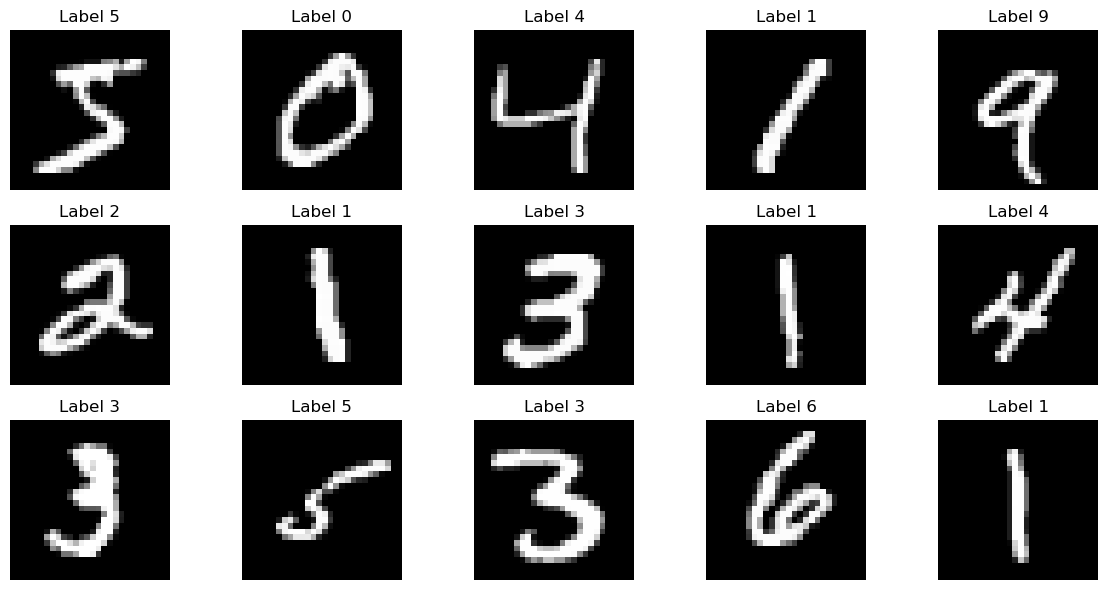

In [6]:
# menampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya
images, labels = mnist.data.to_numpy(), mnist.target.to_numpy()

plt.figure(figsize=(12, 6))

for i in range(15):
    plt.subplot(3, 5, i + 1)  # Membuat subplot 3x5
    plt.imshow(images[i].reshape(28, 28), cmap='gray')  # Menampilkan citra dalam skala abu-abu
    plt.axis('off')  # Menghilangkan sumbu x dan y
    plt.title(f'Label {labels[i]}')  # Menambahkan judul

plt.tight_layout()  # Mengatur tata letak subplot
plt.show()


# Nomor 3

In [7]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Ambil citra dan label
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
images = mnist.data.reshape(-1, 28, 28)
labels = mnist.target.astype(np.uint8)

# Misalnya, kita akan menggunakan PCA dengan 50 komponen utama
n_components = 50

# Skalakan data terlebih dahulu (diperlukan untuk PCA)
scaler = StandardScaler()
images_scaled = scaler.fit_transform(images.reshape(-1, 784))

# Lakukan PCA
pca = PCA(n_components=n_components)
images_pca = pca.fit_transform(images_scaled)

D:\SDK\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# Nomor 4

In [8]:
# membuat data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.
from sklearn.model_selection import train_test_split

# Menggunakan rasio 70:30
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(images_pca, labels, test_size=0.3, random_state=42)

# Menggunakan rasio 80:20
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(images_pca, labels, test_size=0.2, random_state=42)

# Menggunakan rasio 90:10
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(images_pca, labels, test_size=0.1, random_state=42)

# Nomor 5

In [9]:
# melakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# ratio 70:30
# Naive Bayes
nb_70 = GaussianNB()
nb_70.fit(X_train_70, y_train_70)
y_pred_nb_70 = nb_70.predict(X_test_70)
acc_nb_70 = accuracy_score(y_test_70, y_pred_nb_70)

# SVM
svm_70 = SVC()
svm_70.fit(X_train_70, y_train_70)
y_pred_svm_70 = svm_70.predict(X_test_70)
acc_svm_70 = accuracy_score(y_test_70, y_pred_svm_70)

# ratio 80:20
# Naive Bayes
nb_80 = GaussianNB()
nb_80.fit(X_train_80, y_train_80)
y_pred_nb_80 = nb_80.predict(X_test_80)
acc_nb_80 = accuracy_score(y_test_80, y_pred_nb_80)

# SVM
svm_80 = SVC()
svm_80.fit(X_train_80, y_train_80)
y_pred_svm_80 = svm_80.predict(X_test_80)
acc_svm_80 = accuracy_score(y_test_80, y_pred_svm_80)

# ratio 90:10
# Naive Bayes
nb_90 = GaussianNB()
nb_90.fit(X_train_90, y_train_90)
y_pred_nb_90 = nb_90.predict(X_test_90)
acc_nb_90 = accuracy_score(y_test_90, y_pred_nb_90)

# SVM
svm_90 = SVC()
svm_90.fit(X_train_90, y_train_90)
y_pred_svm_90 = svm_90.predict(X_test_90)
acc_svm_90 = accuracy_score(y_test_90, y_pred_svm_90)

# Nomor 6
Evaluasi model yang Anda buat terhadap data training dan data testing.
- Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.
- Gunakan fungsi classication_report untuk mengetahui performa model secara holistik.
- Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

In [10]:
# Evaluasi Naive Bayes
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluasi model Naive Bayes dengan rasio 70:30
print("Evaluasi Naive Bayes")
print("Evaluasi Naive Bayes dengan rasio 70:30")
print(f"Akurasi data training: {accuracy_score(y_train_70, y_train_70)}")
print(f"Akurasi data testing: {accuracy_score(y_test_70, y_pred_nb_70)}")
print(f"Classification report data testing:\n{classification_report(y_test_70, y_pred_nb_70)}")
print(f"Confusion matrix data testing:\n{confusion_matrix(y_test_70, y_pred_nb_70)}")
print("\n\n")

# Evaluasi model Naive Bayes dengan rasio 80:20
print("Evaluasi Naive Bayes")
print("Evaluasi Naive Bayes dengan rasio 80:20")
print(f"Akurasi data training: {accuracy_score(y_train_80, y_train_80)}")
print(f"Akurasi data testing: {accuracy_score(y_test_80, y_pred_nb_80)}")
print(f"Classification report data testing:\n{classification_report(y_test_80, y_pred_nb_80)}")
print(f"Confusion matrix data testing:\n{confusion_matrix(y_test_80, y_pred_nb_80)}")
print("\n\n")

# Evaluasi model Naive Bayes dengan rasio 90:10
print("Evaluasi Naive Bayes")
print("Evaluasi Naive Bayes dengan rasio 90:10")
print(f"Akurasi data training: {accuracy_score(y_train_90, y_train_90)}")
print(f"Akurasi data testing: {accuracy_score(y_test_90, y_pred_nb_90)}")
print(f"Classification report data testing:\n{classification_report(y_test_90, y_pred_nb_90)}")
print(f"Confusion matrix data testing:\n{confusion_matrix(y_test_90, y_pred_nb_90)}")

Evaluasi Naive Bayes
Evaluasi Naive Bayes dengan rasio 70:30
Akurasi data training: 1.0
Akurasi data testing: 0.7221904761904762
Classification report data testing:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2058
           1       0.84      0.94      0.89      2364
           2       0.66      0.62      0.64      2133
           3       0.83      0.56      0.67      2176
           4       0.73      0.80      0.76      1936
           5       0.78      0.62      0.69      1915
           6       0.94      0.74      0.83      2088
           7       0.84      0.43      0.57      2248
           8       0.50      0.80      0.61      1992
           9       0.56      0.80      0.66      2090

    accuracy                           0.72     21000
   macro avg       0.75      0.72      0.72     21000
weighted avg       0.75      0.72      0.72     21000

Confusion matrix data testing:
[[1910    1   56    8    6   22   23    1   2

In [11]:
# Evaluasi SVM
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# kernel linear
print("Evaluasi SVM kernel")
print("Evaluasi SVM dengan rasio 70:30 kernel linear")
print(f"Akurasi data training: {accuracy_score(y_train_70, y_train_70)}")
print(f"Akurasi data testing: {accuracy_score(y_test_70, y_pred_svm_70)}")
print(f"Classification report data testing:\n{classification_report(y_test_70, y_pred_svm_70)}")
print(f"Confusion matrix data testing:\n{confusion_matrix(y_test_70, y_pred_svm_70)}")
print("\n\n")

# rasio 80:20
print("Evaluasi SVM dengan rasio 80:20 kernel linear")
print(f"Akurasi data training: {accuracy_score(y_train_80, y_train_80)}")
print(f"Akurasi data testing: {accuracy_score(y_test_80, y_pred_svm_80)}")
print(f"Classification report data testing:\n{classification_report(y_test_80, y_pred_svm_80)}")
print(f"Confusion matrix data testing:\n{confusion_matrix(y_test_80, y_pred_svm_80)}")
print("\n\n")

# rasio 90:10
print("Evaluasi SVM dengan rasio 90:10 kernel linear")
print(f"Akurasi data training: {accuracy_score(y_train_90, y_train_90)}")
print(f"Akurasi data testing: {accuracy_score(y_test_90, y_pred_svm_90)}")
print(f"Classification report data testing:\n{classification_report(y_test_90, y_pred_svm_90)}")
print(f"Confusion matrix data testing:\n{confusion_matrix(y_test_90, y_pred_svm_90)}")

Evaluasi SVM kernel
Evaluasi SVM dengan rasio 70:30 kernel linear
Akurasi data training: 1.0
Akurasi data testing: 0.9693809523809523
Classification report data testing:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2058
           1       0.98      0.99      0.98      2364
           2       0.96      0.97      0.97      2133
           3       0.96      0.96      0.96      2176
           4       0.97      0.97      0.97      1936
           5       0.98      0.97      0.97      1915
           6       0.98      0.98      0.98      2088
           7       0.96      0.96      0.96      2248
           8       0.97      0.96      0.96      1992
           9       0.96      0.95      0.95      2090

    accuracy                           0.97     21000
   macro avg       0.97      0.97      0.97     21000
weighted avg       0.97      0.97      0.97     21000

Confusion matrix data testing:
[[2027    1    8    0    2    2   10    

# Nomor 7

In [66]:
# menampilkan citra data testing berserta hasil pelabelannya

# function untuk enampilkan 15 citra pertama dari data testing
def show_images_with_prediction(model, x_test, y_test):
    prediction = model.predict(x_test)
    
    x_test = scaler.inverse_transform(pca.inverse_transform(x_test))
    x_test = x_test.reshape(-1, 28, 28)
    plt.figure(figsize=(12, 6))
    
    for i in range(15):
        plt.subplot(3, 5, i + 1)  # Membuat subplot 3x5
        plt.imshow(x_test[i], cmap='gray')
        plt.axis('off')
        plt.title(f'Label: {y_test[i]} | Prediksi: {prediction[i]}')
        
    plt.tight_layout()  # Mengatur tata letak subplot
    plt.show()

Citra data testing berserta hasil pelabelannya untuk Naive Bayes
Rasio 70:30


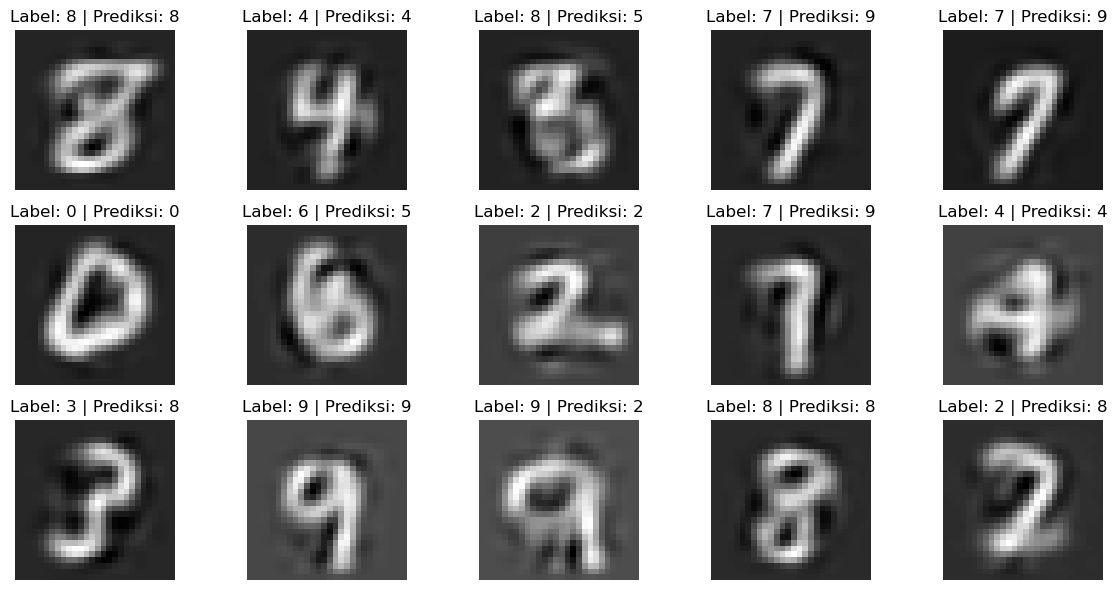

Rasio 80:20


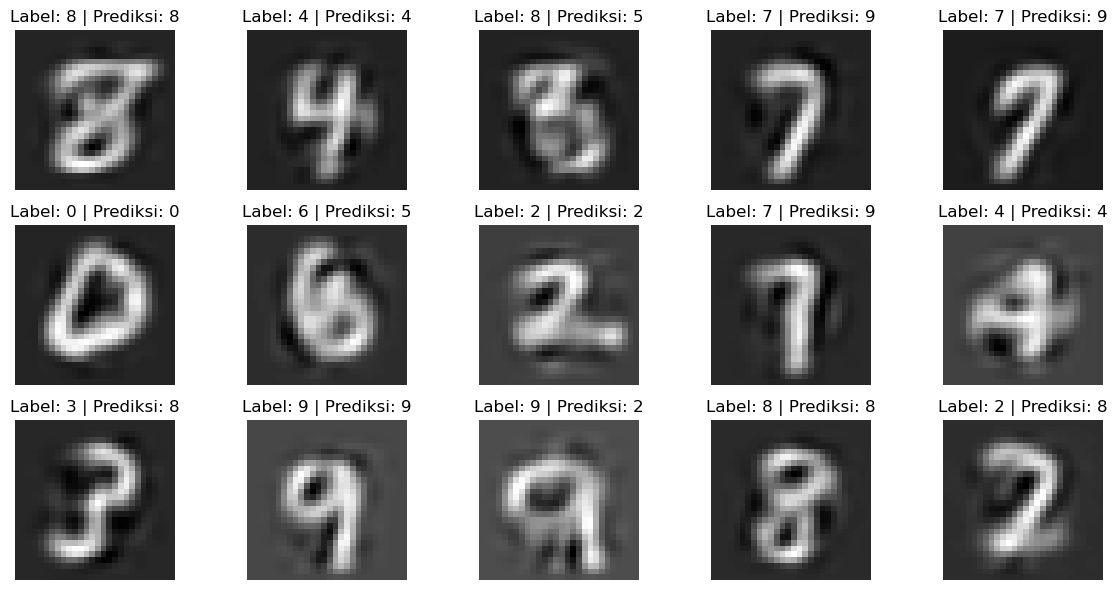

Rasio 90:10


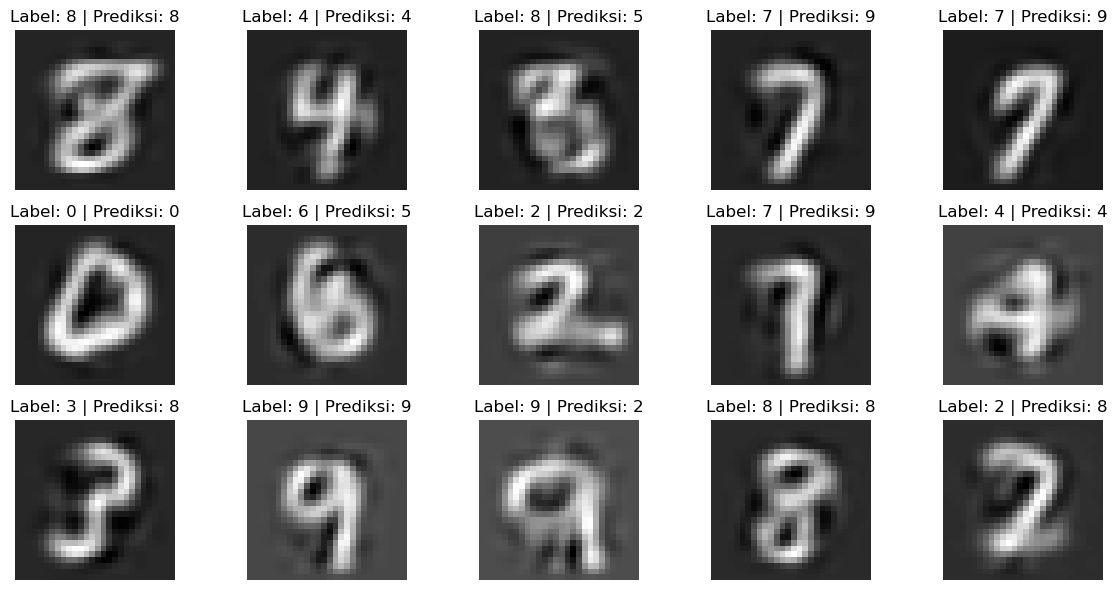

In [67]:
# menampilkan citra data testing berserta hasil pelabelannya untuk Naive Bayes
print("Citra data testing berserta hasil pelabelannya untuk Naive Bayes")
print("Rasio 70:30")
show_images_with_prediction(nb_70, X_test_70, y_test_70)
print("Rasio 80:20")
show_images_with_prediction(nb_80, X_test_80, y_test_80)
print("Rasio 90:10")
show_images_with_prediction(nb_90, X_test_90, y_test_90)

Citra data testing berserta hasil pelabelannya untuk SVM
Rasio 70:30


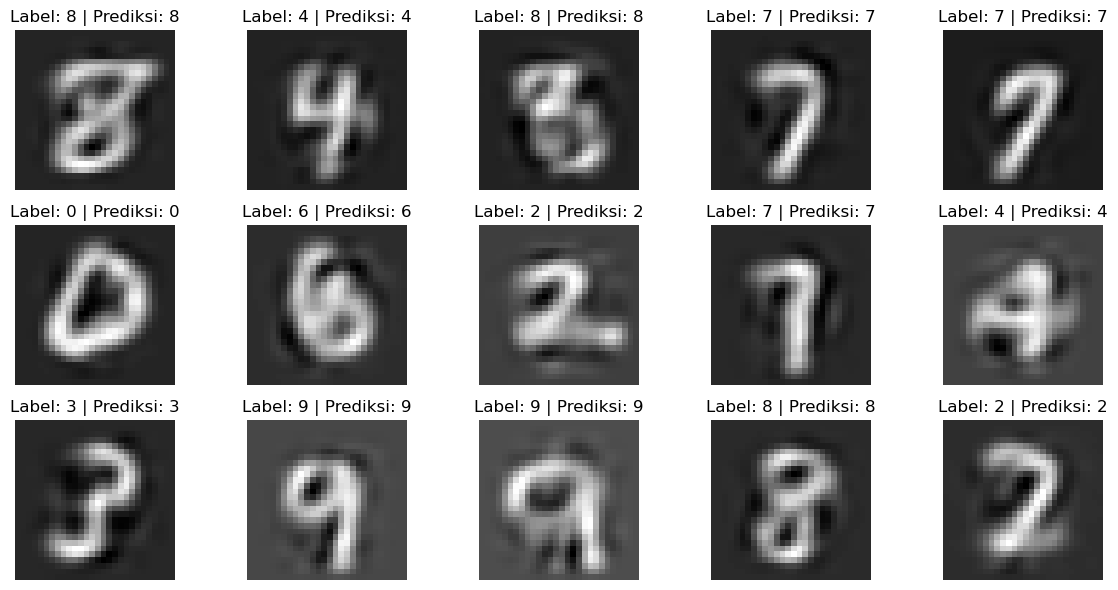

Rasio 80:20


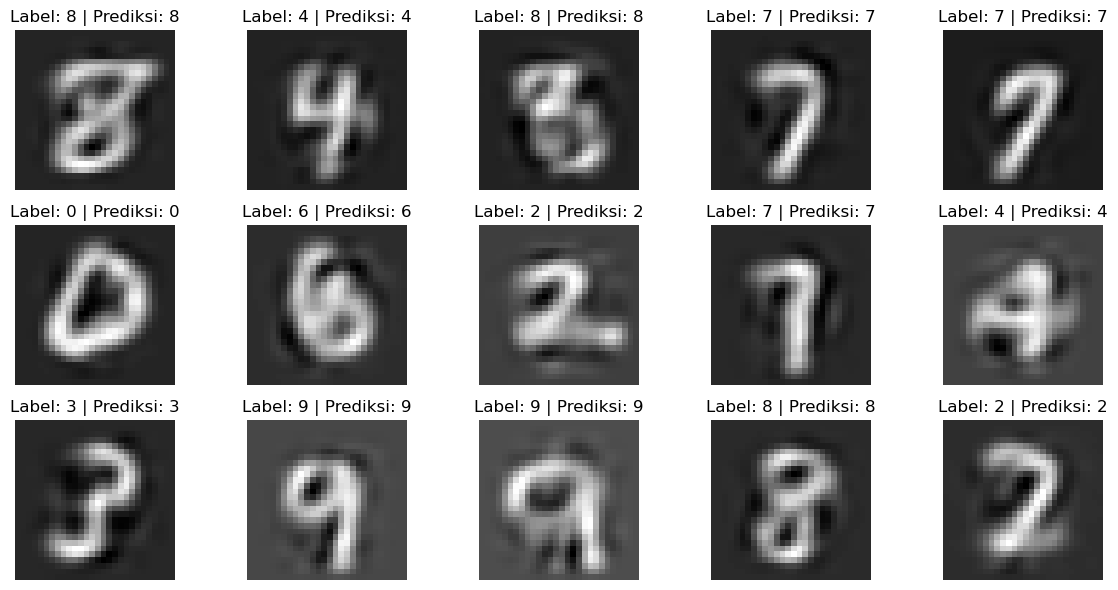

Rasio 90:10


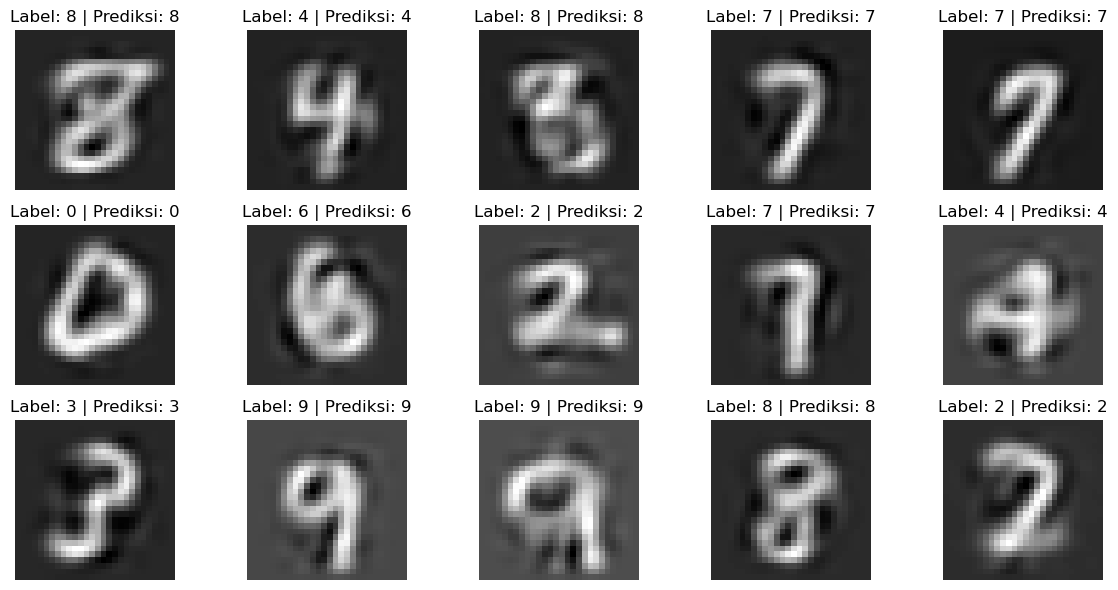

In [68]:
# menampilkan citra data testing berserta hasil pelabelannya untuk SVM
print("Citra data testing berserta hasil pelabelannya untuk SVM")
print("Rasio 70:30")
show_images_with_prediction(svm_70, X_test_70, y_test_70)
print("Rasio 80:20")
show_images_with_prediction(svm_80, X_test_80, y_test_80)
print("Rasio 90:10")
show_images_with_prediction(svm_90, X_test_90, y_test_90)

# Nomor 8

Dapat disimpulkan bahwa model terbaik yang didapatkan adalah model SVM dengan rasio 70:30. Hal ini dapat dilihat dari akurasi data testing yang paling tinggi dibandingkan dengan model lainnya, yaitu sebesar 0.97.